In [130]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [131]:
data=pd.read_csv("dataset1/Train1.csv",header=None,names=["x1","x2","y"])

In [132]:
data1=data.head(10)
data1

,x1,x2,y
0,4.830686,3.050905,0.0
1,4.385330,4.491989,0.0
2,5.653520,4.852372,0.0
3,3.487049,5.517360,0.0
4,6.339344,5.173789,0.0
5,15.249076,16.366936,1.0
6,3.357427,6.741764,0.0
7,14.594383,15.573734,1.0
8,5.299253,4.872819,0.0
9,13.767095,13.991792,1.0


In [133]:
w=np.zeros(3)

In [134]:
print(w)

[0. 0. 0.]


In [135]:
inputs=[]

In [136]:
for i in range(data.shape[0]):
    inputs.append([data["x1"][i],data["x2"][i]])

In [137]:
print(inputs)

[[4.830686144835195, 3.0509045618358006], [4.385329747910832, 4.491988650300192], [5.65352032854969, 4.8523715427791965], [3.487049383550924, 5.5173595117621534], [6.339343715590834, 5.173788802060892], [15.249075667152484, 16.366936271169592], [3.357427123192152, 6.741764483533704], [14.594383321128365, 15.573733732888927], [5.299253321984823, 4.8728191228618645], [13.767095441053609, 13.991792455253943], [15.410058106574944, 16.096325330098942], [5.686978898907319, 4.328493861441548], [13.815473598219047, 16.045638706715042], [4.489414843360077, 4.052692902964184], [4.398529981016411, 4.67640882525449], [4.407451810502872, 4.331048442317154], [15.727130519302694, 13.046297159890832], [16.98427446136776, 15.47946595577269], [4.42883906692029, 7.594248355055439], [5.081280640999596, 4.730676810744224], [5.9403544975373155, 4.613607598763428], [15.289444399830092, 15.623456727054732], [4.998757198637916, 5.300293447355767], [15.200637816766813, 16.145888350401666], [15.347233186359718, 

In [138]:
labels=data["y"]

In [139]:
#print(labels)

In [140]:
np.dot([1,2],[4,7])

18

In [168]:
weights=np.zeros(3)
error=0
iteration=0
losses=[]
def predict(input):
        summation = np.dot(input,weights[1:]) + weights[0]
        if summation > 0:
          activation = 1
        else:
          activation = 0            
        return activation
    
def train(inputs, labels):
    global iteration
    for _ in range(100):
        for input, label in zip(inputs, labels):
            loss=0
            prediction =predict(input)
            weights[1:] +=np.dot(0.01*(int(label) - prediction) ,input)
            loss+=(int(label)-prediction)
            weights[0] += 0.01*(int(label) - prediction)
        losses.append(loss)
        iteration=iteration+1
    
train(inputs,labels)
print(weights)

[-0.17       -0.00590932  0.0233254 ]


In [172]:
iteration=[i for i in range(100)]
print(len(iteration))
print(len(losses))

100
100


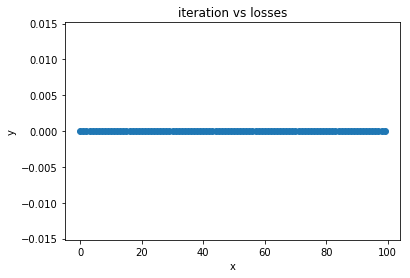

In [176]:
plt.scatter(iteration,losses)
plt.title('iteration vs losses')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [142]:
test_data=pd.read_csv("dataset1/Test1.csv",header=None,names=["x","y","l"])

In [143]:
testx_y=[]
for i in range(test_data.shape[0]):
    testx_y.append([test_data["x"][i],test_data["y"][i]])


In [144]:
test_lbl=test_data["l"]
#print(test_data)


In [145]:
px=[]
py=[]
nx=[]
ny=[]
predicted_lbl=[]
def test(cord):
    for x_y in (cord):
        pred=predict(x_y)
        predicted_lbl.append(pred)
        if(pred==1):
            px.append(x_y[0])
            py.append(x_y[1])
        else:
            nx.append(x_y[0])
            ny.append(x_y[1])
        
            
test(testx_y)

In [146]:
px

[14.62138419616008,
 15.555875536672838,
 14.635677154203844,
 15.15408039585351,
 15.651219326322103,
 14.469391934537517,
 15.439090800781958,
 16.049964096830728,
 13.887294681280622,
 15.278746075165472,
 14.03110697409393,
 13.653158848862216,
 13.22291416425496,
 13.241170368185623,
 15.98020304385928,
 15.021362155184045,
 14.801292578960128,
 14.048171518698885,
 14.114317979557645,
 14.938502487374791,
 13.041641561522146,
 14.286370606311564,
 15.76219059987511,
 15.170874723883156,
 15.128872033367571,
 13.963443355482388,
 14.878645112346835,
 14.259008729133837,
 16.08250023623621,
 14.939556812603472,
 14.686873583313757,
 15.490014605213306,
 13.648024708515978,
 13.942615300259767,
 15.15004709347494,
 15.07659176285864,
 15.256233507046867,
 11.732163916528547,
 15.751582045601088,
 15.07686395657362,
 14.668819098195923,
 14.233043048132604,
 16.11441260265278,
 15.088651691177747,
 16.53574060555817,
 15.994738214532573,
 15.365089909165427,
 14.275762142015596,
 15.

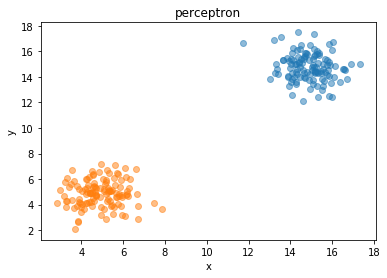

In [147]:
plt.scatter(px, py,alpha=0.5)
plt.scatter(nx, ny,alpha=0.5)
plt.title('perceptron')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [153]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_lbl,predicted_lbl))

[[123   0]
 [  0 117]]


In [154]:
#accuracy for the test data
from sklearn import metrics
print('test_accuracy:',metrics.accuracy_score(test_lbl,predicted_lbl))

test_accuracy: 1.0
